KNN MODEL

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
Y=iris.target


In [2]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


n_neighbors=5
This sets k in k-nearest neighbors.
The model will look at the 5 closest points in the training set to make a prediction.

metric='minkowski'
This tells the model how to measure distance between points.
Minkowski distance is a generalization of other distances:
If p=1 → Manhattan distanceIf & p=2 → Euclidean distance (the straight-line distance)

p=2
This is used only when metric='minkowski'.
p=2 means it will calculate Euclidean distance.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=20)

In [10]:
y_predictions=classifier.predict(X_test)

In [5]:
print(Y_test.shape)
print(y_predictions.shape)

(45,)
(45,)


EVALUATION using Confusion Matrix and Accuracy

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy=accuracy_score(Y_test,y_predictions)
Matrix_eval=confusion_matrix(Y_test,y_predictions)
print(f"{accuracy} is the accuracy of the model")
print(f"{Matrix_eval} is confusion matrix of the model")

0.9777777777777777 is the accuracy of the model
[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]] is confusion matrix of the model


Tried for different values of n_neighbors but the accuracy remained same 0.97777

Visualising Decision Boundaries

plot_decision_regions from mlxtend can only visualize 2D feature spaces, but here we have 4 features of the Iris dataset (X has shape (150, 4)). So, we'll reduce 4 features to 2 using PCA, which will provide 2 important features.

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_t,X_te,Y_t,Y_te=train_test_split(X_pca,Y,test_size=0.2,random_state=42)
classifier.fit(X_t,Y_t)

KNeighborsClassifier(n_neighbors=20)

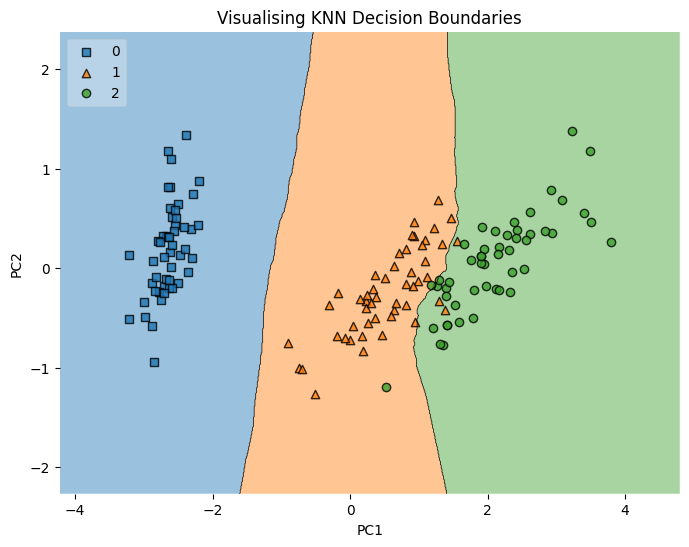

In [8]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plot_decision_regions(X_pca,Y,clf=classifier,legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualising KNN Decision Boundaries')
plt.show()